In [434]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as gp

In [2]:
bd.list_datasets(filter_by='ibge', with_description=True)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=BC2oQemeRz74kqL7e2TGzMua0mTNrU&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWh-h-2sFCllsLfmpP7PpuH1ZBjteVt_bv5NuCJ2sjmiuvP7IgYCVBw

dataset_id: 
	br_ibge_amc 
description: 
	Mapeamento completo de municípios para Áreas Minimamente Comparáveis entre os anos 
e 2010. 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ibge_cbo_2002 
description: 
	Informações sobre a Classificação Brasileira de Ocupações 2002. 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ibge_censo_demografico 
description: 
	Dados do Censo Demográfico do 

In [4]:
bd.get_table_size(dataset_id='br_tse_eleicoes',
                  table_id='candidatos',
                  billing_project_id="rfid-250503")


project_id: 
	basedosdados 
dataset_id: 
	br_tse_eleicoes 
table_id: 
	candidatos 
num_rows: 
	2858297 
size_mb: 
	718.03 
-----------------------------------------------------------------------------------------------



In [5]:
bd.get_table_size(dataset_id='br_tse_eleicoes',
                  table_id='resultados_candidato',
                  billing_project_id="rfid-250503")


project_id: 
	basedosdados 
dataset_id: 
	br_tse_eleicoes 
table_id: 
	resultados_candidato 
num_rows: 
	2598426 
size_mb: 
	211.58 
-----------------------------------------------------------------------------------------------



In [8]:
query = """
SELECT *
FROM `basedosdados.br_tse_eleicoes.candidatos` 
WHERE ano = 2018
"""
df_candidatos = bd.read_sql(query, billing_project_id="rfid-250503")


Downloading: 100%|███████████████████████████████████████████████████████████| 29088/29088 [00:16<00:00, 1742.91rows/s]


In [37]:
query = """
SELECT *
FROM `basedosdados.br_tse_eleicoes.resultados_candidato` 
WHERE ano = 2018
"""
df_resultados = bd.read_sql(query, billing_project_id="rfid-250503")

Downloading: 100%|███████████████████████████████████████████████████████████| 26462/26462 [00:03<00:00, 6853.72rows/s]


## Limpeza dos dados

### Base df_resultados

In [38]:
df_resultados

,ano,turno,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,sigla_partido,numero_candidato,sequencial_candidato,id_candidato_bd,resultado,votos
0,2018,1,eleicao ordinaria,None,None,None,presidente,DC,27,280000624085,None,nao eleito,41710
1,2018,1,eleicao ordinaria,None,None,None,presidente,MDB,15,280000622281,897799,nao eleito,1288950
2,2018,1,eleicao ordinaria,None,None,None,presidente,NOVO,30,280000607640,1494256,nao eleito,2679745
3,2018,1,eleicao ordinaria,None,None,None,presidente,PATRIOTA,51,280000602500,767512,nao eleito,1348323
4,2018,1,eleicao ordinaria,None,None,None,presidente,PDT,12,280000605589,616370,nao eleito,13344371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26457,2018,2,eleicao ordinaria,SC,None,None,governador,PSL,17,240000609724,1405354,eleito,2644179
26458,2018,2,eleicao ordinaria,SE,None,None,governador,PSB,40,260000614791,1604206,nao eleito,370161
26459,2018,2,eleicao ordinaria,SE,None,None,governador,PSD,55,260000623573,730970,eleito,679051
26460,2018,2,eleicao ordinaria,SP,None,None,governador,PSB,40,250000615141,328516,nao eleito,10248740


Queremos apenas os candidatos que:
    1. Concorreram para cargos legislativos
    2. Foram eleitos

    
Vamos ver quais os os cargos que foram votados em 2018

In [39]:
df_resultados.cargo.unique()

array(['presidente', 'deputado estadual', 'deputado federal',
       'governador', 'senador', 'deputado distrital'], dtype=object)

In [40]:
cargos_legislativos = [
    'deputado estadual', 'deputado federal', 'senador', 'deputado distrital'
]

Vamos selecionar os resultados que indicam que o candidato foi eleito

In [48]:
df_resultados.resultado.unique()

array(['nao eleito', '2º turno', 'suplente', 'eleito por qp',
       'eleito por media', 'eleito'], dtype=object)

In [49]:
categ_eleito = ['eleito', 'eleito por qp', 'eleito por media']

Agora filtramos apenas os resultados que nos interessa

In [50]:
eleitos = df_resultados.resultado.isin(categ_eleito)
legislativos = df_resultados.cargo.isin(cargos_legislativos)

In [51]:
df_eleitos_legis = df_resultados[eleitos&legislativos]

Mantemos apenas as colunas que nos serão úteis

In [59]:
df_eleitos_legis.columns

Index(['ano', 'turno', 'tipo_eleicao', 'sigla_uf', 'id_municipio',
       'id_municipio_tse', 'cargo', 'sigla_partido', 'numero_candidato',
       'sequencial_candidato', 'id_candidato_bd', 'resultado', 'votos'],
      dtype='object')

In [111]:
colunas_selecionadas = ['tipo_eleicao','sigla_uf','cargo',
                        'sigla_partido','id_candidato_bd',
                        'resultado','votos','sequencial_candidato']

In [112]:
df_eleitos_legis_col_sel = df_eleitos_legis[colunas_selecionadas]

In [113]:
df_eleitos_legis_col_sel

,tipo_eleicao,sigla_uf,cargo,sigla_partido,id_candidato_bd,resultado,votos,sequencial_candidato
52,eleicao ordinaria,AC,deputado estadual,DEM,479202,eleito por qp,5021,10000624305
64,eleicao ordinaria,AC,deputado estadual,MDB,1462277,eleito por qp,9405,10000610628
70,eleicao ordinaria,AC,deputado estadual,MDB,1276214,eleito por media,9139,10000610634
73,eleicao ordinaria,AC,deputado estadual,MDB,1347133,eleito por qp,10349,10000610637
78,eleicao ordinaria,AC,deputado estadual,PC do B,798934,eleito por qp,6662,10000608372
...,...,...,...,...,...,...,...,...
26402,eleicao ordinaria,TO,deputado federal,PT,625895,eleito por media,18167,270000626122
26416,eleicao ordinaria,TO,deputado federal,SOLIDARIEDADE,119394,eleito por qp,71842,270000618825
26417,eleicao ordinaria,TO,deputado federal,SOLIDARIEDADE,801809,eleito por qp,48812,270000618830
26424,eleicao ordinaria,TO,senador,PSD,1379625,eleito,214355,270000626087


Checamos se os dados estão coerentes com o que conhecemos das eleições

In [65]:
df_eleitos_legis_col_sel.cargo.value_counts()

deputado estadual     1035
deputado federal       513
senador                 52
deputado distrital      24
Name: cargo, dtype: int64

### Base df_canditatos

In [58]:
df_candidatos.columns

Index(['ano', 'tipo_eleicao', 'sigla_uf', 'id_municipio', 'id_municipio_tse',
       'id_candidato_bd', 'cpf', 'titulo_eleitoral', 'sequencial', 'numero',
       'nome', 'nome_urna', 'numero_partido', 'sigla_partido', 'cargo',
       'situacao', 'ocupacao', 'data_nascimento', 'idade', 'genero',
       'instrucao', 'estado_civil', 'nacionalidade', 'sigla_uf_nascimento',
       'municipio_nascimento', 'email', 'raca'],
      dtype='object')

In [75]:
print(df_candidatos.iloc[0])

ano                                      2018
tipo_eleicao                eleicao ordinaria
sigla_uf                                   MS
id_municipio                             None
id_municipio_tse                         None
id_candidato_bd                        987676
cpf                               32242603191
titulo_eleitoral                 006354201937
sequencial                       120000619283
numero                                   2929
nome                              Dilson Arce
nome_urna                          Dirce Arce
numero_partido                             29
sigla_partido                             PCO
cargo                        deputado federal
situacao                           indeferido
ocupacao                               outros
data_nascimento           1964-11-09 00:00:00
idade                                    54.0
genero                              masculino
instrucao                        le e escreve
estado_civil                      

In [100]:
df_candidatos_def = df_candidatos[df_candidatos['situacao']=='deferido']

In [114]:
colsel_caract_candidatos = ['nome','nome_urna',
                            'ocupacao','data_nascimento',
                            'idade','genero','instrucao','estado_civil',
                            'nacionalidade','sigla_uf_nascimento',
                            'municipio_nascimento','raca','sequencial']

In [115]:
df_candidatos_col_sel = df_candidatos_def[colsel_caract_candidatos]

### Juntamos as 2 bases

In [145]:
df_uni = pd.merge(left=df_eleitos_legis_col_sel,
                     right=df_candidatos_col_sel,
                     left_on='sequencial_candidato',
                     right_on='sequencial',
                     how="left")

In [153]:
df_uni_mul = df_uni[df_uni.genero=='feminino']
df_uni_hom = df_uni[df_uni.genero=='masculino']

# Começamos as visualizações

In [162]:
df_uni['genero'].value_counts().index.values


array(['masculino', 'feminino'], dtype=object)

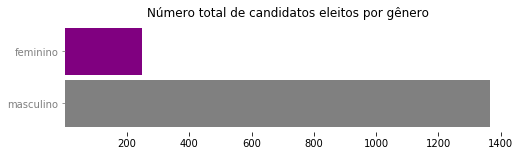

In [275]:
f, ax = plt.subplots(figsize=(8, 2))

colors = ['grey', 'purple']

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', colors='gray')

plt.barh(y=df_uni['genero'].value_counts().index.values,
         height=0.9,
         width=df_uni['genero'].value_counts().values,
         color=colors,
         left=[1, 1.2])
plt.title('Número total de candidatos eleitos por gênero', fontsize=12)
plt.xlabel('')
plt.show()

In [214]:
df_uni_mul.shape[0]

245

In [266]:
Mul_raca = (df_uni_mul['raca'].value_counts())*100/df_uni_mul.shape[0]
Hom_raca = (df_uni_hom['raca'].value_counts())*100/df_uni_hom.shape[0]

In [406]:
Mul_raca

branca      73.061224
parda       18.775510
preta        7.755102
indigena     0.408163
Name: raca, dtype: float64

In [407]:
Hom_raca

branca     72.474378
parda      24.084919
preta       3.221083
amarela     0.219619
Name: raca, dtype: float64

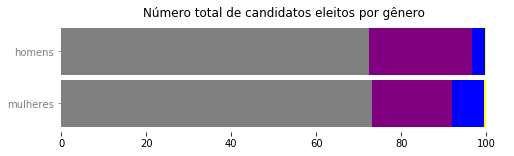

In [265]:
f, ax = plt.subplots(figsize=(8, 2))

colors = ['grey', 'purple','blue','yellow','red']

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.tick_params(axis='y', colors='gray')

p1 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_raca.values[0],
        color = colors[0])
lefts = Mul_raca.values[0]

p2 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_raca.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Mul_raca.values[1]

p3 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_raca.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Mul_raca.values[2]

p4 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_raca.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Mul_raca.values[3]


p1 = plt.barh(y='homens',
        height=0.9,
        width = Hom_raca.values[0],
        color = colors[0])
lefts = Hom_raca.values[0]

p2 = plt.barh(y='homens',
        height=0.9,
        width = Hom_raca.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Hom_raca.values[1]

p3 = plt.barh(y='homens',
        height=0.9,
        width = Hom_raca.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Hom_raca.values[2]

p4 = plt.barh(y='homens',
        height=0.9,
        width = Hom_raca.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Hom_raca.values[3]


plt.title('Percentual de eleitos por raça', fontsize=12)
plt.xlabel('')
plt.show()

In [278]:
Mul_instrucao

ensino superior completo         81.632653
ensino medio completo            10.612245
ensino superior incompleto        6.530612
ensino fundamental completo       0.816327
ensino fundamental incompleto     0.408163
Name: instrucao, dtype: float64

In [277]:
Hom_instrucao

ensino superior completo         73.645681
ensino medio completo            13.762811
ensino superior incompleto        9.150805
ensino fundamental completo       1.976574
ensino fundamental incompleto     0.805271
ensino medio incompleto           0.585652
le e escreve                      0.073206
Name: instrucao, dtype: float64

In [432]:
Mul_instrucao = (df_uni_mul['instrucao'].value_counts())*100/df_uni_mul.shape[0]
Hom_instrucao = (df_uni_hom['instrucao'].value_counts())*100/df_uni_hom.shape[0]


y_age = Hom_instrucao.index.values
x_M = Hom_instrucao.values
x_F = Mul_instrucao.values * -1

In [436]:
fig = gp.Figure()
  
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M, 
                     name = 'Male',
                     orientation = 'h'))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = x_F,
                     name = 'Female', orientation = 'h'))
  
# Updating the layout for our graph
fig.update_layout(title = 'Population Pyramid of India-2019',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-60000000, -40000000, -20000000,
                                          0, 20000000, 40000000, 60000000],
                                
                              ticktext = ['6M', '4M', '2M', '0', 
                                          '2M', '4M', '6M'],
                                
                              title = 'Population in Millions',
                              title_font_size = 14)
                 )
  
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'height'

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            base .
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            offset .
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        r
            r coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the radial
            coordinatesfor legacy polar chart only.
        rsrc
            Sets the source reference on Chart Studio Cloud for  r
            .
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        t
            t coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the
            angular coordinatesfor legacy polar chart only.
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            textposition .
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available. variables `value` and
            `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            texttemplate .
        tsrc
            Sets the source reference on Chart Studio Cloud for  t
            .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            width .
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        

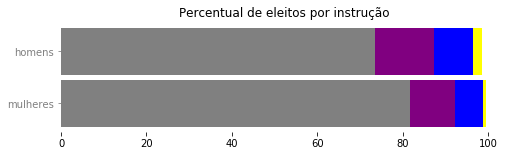

In [270]:

f, ax = plt.subplots(figsize=(8, 2))

colors = ['grey','purple','blue','yellow','red']

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.tick_params(axis='y', colors='gray')

p1 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_instrucao.values[0],
        color = colors[0])
lefts = Mul_instrucao.values[0]

p2 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_instrucao.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Mul_instrucao.values[1]

p3 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_instrucao.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Mul_instrucao.values[2]

p4 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_instrucao.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Mul_instrucao.values[3]


p1 = plt.barh(y='homens',
        height=0.9,
        width = Hom_instrucao.values[0],
        color = colors[0])
lefts = Hom_instrucao.values[0]

p2 = plt.barh(y='homens',
        height=0.9,
        width = Hom_instrucao.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Hom_instrucao.values[1]

p3 = plt.barh(y='homens',
        height=0.9,
        width = Hom_instrucao.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Hom_instrucao.values[2]

p4 = plt.barh(y='homens',
        height=0.9,
        width = Hom_instrucao.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Hom_instrucao.values[3]


plt.title('Percentual de eleitos por instrução', fontsize=12)
plt.xlabel('')
plt.show()

In [ ]:
estado_civil

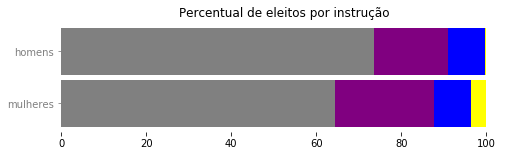

In [273]:
Mul_estado_civil = (df_uni_mul['estado_civil'].value_counts())*100/df_uni_mul.shape[0]
Hom_estado_civil = (df_uni_hom['estado_civil'].value_counts())*100/df_uni_hom.shape[0]

f, ax = plt.subplots(figsize=(8, 2))

colors = ['grey', 'purple','blue','yellow','red']

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.tick_params(axis='y', colors='gray')

p1 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_estado_civil.values[0],
        color = colors[0])
lefts = Mul_estado_civil.values[0]

p2 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_estado_civil.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Mul_estado_civil.values[1]

p3 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_estado_civil.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Mul_estado_civil.values[2]

p4 = plt.barh(y='mulheres',
        height=0.9,
        width = Mul_estado_civil.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Mul_estado_civil.values[3]


p1 = plt.barh(y='homens',
        height=0.9,
        width = Hom_estado_civil.values[0],
        color = colors[0])
lefts = Hom_estado_civil.values[0]

p2 = plt.barh(y='homens',
        height=0.9,
        width = Hom_estado_civil.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Hom_estado_civil.values[1]

p3 = plt.barh(y='homens',
        height=0.9,
        width = Hom_estado_civil.values[2],
        color = colors[2],
        left = lefts)

lefts = lefts + Hom_estado_civil.values[2]

p4 = plt.barh(y='homens',
        height=0.9,
        width = Hom_estado_civil.values[3],
        color = colors[3],
        left = lefts)

lefts = lefts + Hom_estado_civil.values[3]


plt.title('Percentual de eleitos por instrução', fontsize=12)
plt.xlabel('')

plt.show()

In [394]:
Mul_estado_civil

casado(a)        64.489796
solteiro(a)      23.265306
divorciado(a)     8.571429
viuvo(a)          3.673469
Name: estado_civil, dtype: float64

In [395]:
Mul_idade = (df_uni_mul['idade'].value_counts())*100/df_uni_mul.shape[0]

In [396]:
testdata = df_uni[['genero','idade']]

In [398]:
ranges = [20,30,40,50,60,70,80,90]

mas =  testdata['genero'] == 'masculino'
testdatamas = testdata[mas][['idade']]
testdatamas = testdatamas.groupby(pd.cut(testdatamas.idade,
                           ranges)).count() * 100 / df_uni_hom.shape[0]

fem = testdata['genero'] == 'feminino'
testdatafem = testdata[fem][['idade']]
testdatafem = testdatafem.groupby(pd.cut(testdatafem.idade,
                           ranges)).count() * 100 / df_uni_mul.shape[0]

y_label_idade = [ "(20, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 90]"]

Text(0.5, 1.0, 'Observa-se que apesar da pequena diferença percentual em todas as faixas, as mulheres tem uma maior proporção\n nas faixas mais jovens (20,50) e os homens tem maior proporção nas faixas mais velhas (50,80)')

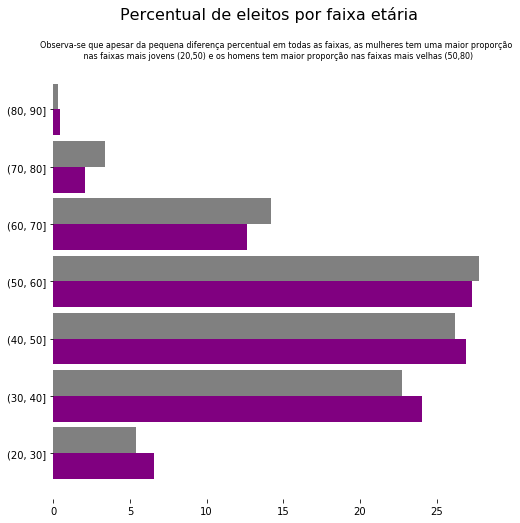

In [423]:
f, ax = plt.subplots(figsize=(8, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


p23 = plt.barh(y=y_label_idade,
               height=0.45,
               width=testdatamas['idade'].values,
               align='edge',
               color='gray')

p23 = plt.barh(y=y_label_idade,
               height=-0.45,
               width=testdatafem['idade'].values,
               align='edge',
               color=colors[1])
plt.suptitle('Percentual de eleitos por faixa etária', fontsize=16)
plt.title('Observa-se que apesar da pequena diferença percentual em todas as faixas, as mulheres tem uma maior proporção\n nas faixas mais jovens (20,50) e os homens tem maior proporção nas faixas mais velhas (50,80)', fontsize=8)




In [424]:
ranges = [20,50,90]

mas =  testdata['genero'] == 'masculino'
testdatamas = testdata[mas][['idade']]
testdatamas = testdatamas.groupby(pd.cut(testdatamas.idade,
                           ranges)).count() * 100 / df_uni_hom.shape[0]

fem = testdata['genero'] == 'feminino'
testdatafem = testdata[fem][['idade']]
testdatafem = testdatafem.groupby(pd.cut(testdatafem.idade,
                           ranges)).count() * 100 / df_uni_mul.shape[0]

y_label_idade = [ "(20, 50]", "(50, 90]"]

Text(0.5, 0.98, 'Percentual de eleitos por faixa etária')

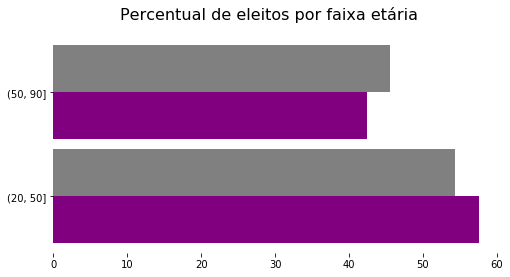

In [427]:
f, ax = plt.subplots(figsize=(8, 4))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


p23 = plt.barh(y=y_label_idade,
               height=0.45,
               width=testdatamas['idade'].values,
               align='edge',
               color='gray')

p23 = plt.barh(y=y_label_idade,
               height=-0.45,
               width=testdatafem['idade'].values,
               align='edge',
               color=colors[1])
plt.suptitle('Percentual de eleitos por faixa etária', fontsize=16)

